In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import scipy.stats as sp_stats
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
# Import Files
file = "new_data_2.csv"
tracks = pd.read_csv(file, parse_dates=['release_date'])
tracks.head() # tracks have 72720 rows x 19 columns

,Unnamed: 0,name,popularity,duration_in_seconds,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,quarter
0,0,A Lover's Concerto,41,159.560,0,['The Toys'],2020-03-13,0.671,0.867,-2.706,0.0571,0.436,0.000000,0.1390,0.839,120.689,2020-03-01,2020,2020Q1
1,1,The September Of My Years - Live At The Sands ...,26,187.333,0,['Frank Sinatra'],2018-05-04,0.319,0.201,-17.796,0.0623,0.887,0.000000,0.9040,0.239,117.153,2018-05-01,2018,2018Q2
2,2,It Was A Very Good Year - Live At The Sands Ho...,25,236.800,0,['Frank Sinatra'],2018-05-04,0.269,0.129,-18.168,0.0576,0.938,0.000005,0.6830,0.160,82.332,2018-05-01,2018,2018Q2
3,3,"The Circle Game - Live at The 2nd Fret, Philad...",18,313.093,0,['Joni Mitchell'],2020-10-30,0.644,0.212,-14.118,0.0347,0.881,0.000022,0.7980,0.441,117.072,2020-10-01,2020,2020Q4
4,4,"Urge For Going - Live at The 2nd Fret, Philade...",18,295.093,0,['Joni Mitchell'],2020-10-30,0.627,0.184,-15.533,0.0450,0.955,0.000162,0.0986,0.299,115.864,2020-10-01,2020,2020Q4


A total of 10235 songs were released in 2015.
A total of 10777 songs were released in 2016.
A total of 9780 songs were released in 2017.
A total of 10715 songs were released in 2018.
A total of 11746 songs were released in 2019.
A total of 13741 songs were released in 2020.
A total of 5726 songs were released in 2021.


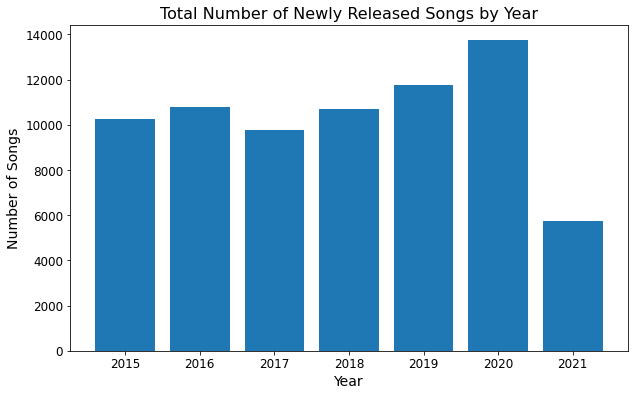

In [3]:
# Volume of released music per year

tracks_2015 = len(tracks.loc[tracks['release_date'] < "2016-01-01"]) #10264
tracks_2016 = len(tracks.loc[(tracks["release_date"] > "2015-12-31") & (tracks["release_date"] < "2017-01-01")]) #10804
tracks_2017 = len(tracks.loc[(tracks["release_date"] > "2016-12-31") & (tracks["release_date"] < "2018-01-01")]) #9792
tracks_2018 = len(tracks.loc[(tracks["release_date"] > "2017-12-31") & (tracks["release_date"] < "2019-01-01")]) #10771
tracks_2019 = len(tracks.loc[(tracks["release_date"] > "2018-12-31") & (tracks["release_date"] < "2020-01-01")]) #11771
tracks_2020 = len(tracks.loc[(tracks["release_date"] > "2019-12-31") & (tracks["release_date"] < "2021-01-01")]) #13766
tracks_2021 = len(tracks.loc[tracks["release_date"] > "2020-12-31"]) #5775

# Print result:
TotalVolume = [tracks_2015, tracks_2016, tracks_2017, tracks_2018, tracks_2019, tracks_2020, tracks_2021]
i = 2015
for volume in TotalVolume:
    print(f"A total of {volume} songs were released in {i}.")
    i = i + 1

# To graph this in a bar chart
x_axis = np.arange(2015, 2022, 1)
plt.figure(figsize=(10,6))
plt.bar(x=x_axis, height=TotalVolume)
plt.title("Total Number of Newly Released Songs by Year", fontsize=16)
plt.xlabel("Year", fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Number of Songs", fontsize=14)
plt.savefig("Total Number of Newly Released Songs by Year", facecolor="white")
plt.show()

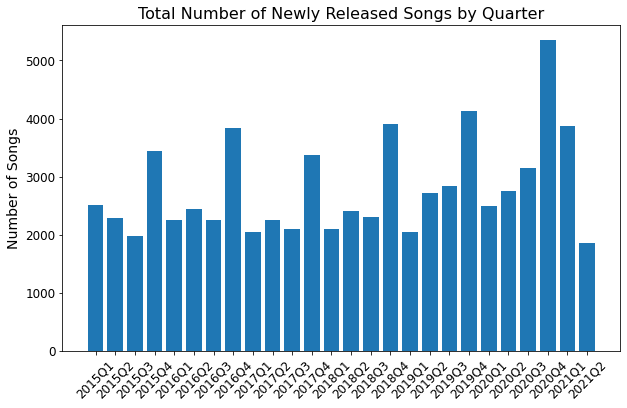

In [4]:
# Quarterly volume change

# Set up axis
x_axis_quarterly = tracks["quarter"].unique().tolist()
x_axis_quarterly.sort()
tracks_quarter = tracks.groupby("quarter")
height_quarter = tracks_quarter["name"].count()

# Graph
plt.figure(figsize=(10,6))
plt.bar(x=x_axis_quarterly, height=height_quarter)
plt.title("Total Number of Newly Released Songs by Quarter", fontsize=16)
plt.ylabel("Number of Songs", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Total Number of Newly Released Songs by Quarter", facecolor="white")
plt.show()

In [5]:
# Let's look at Music Trend by Year
grouped_avg = tracks.groupby("year").agg({"danceability": "mean","energy":"mean", "speechiness":"mean", 
                                      "acousticness":"mean", "valence":"mean", "explicit":"mean"})
grouped_avg

,danceability,energy,speechiness,acousticness,valence,explicit
year,,,,,,
2015,0.598816,0.650896,0.084369,0.293570,0.508292,0.102785
2016,0.607457,0.658413,0.093959,0.282334,0.495939,0.125638
2017,0.625758,0.659662,0.100114,0.278274,0.493427,0.172290
2018,0.635623,0.653849,0.105013,0.276002,0.482426,0.190201
2019,0.650893,0.636790,0.110389,0.293986,0.493060,0.216755
2020,0.658587,0.639914,0.111564,0.271072,0.501836,0.219853
2021,0.668219,0.608707,0.126650,0.288460,0.495748,0.275410


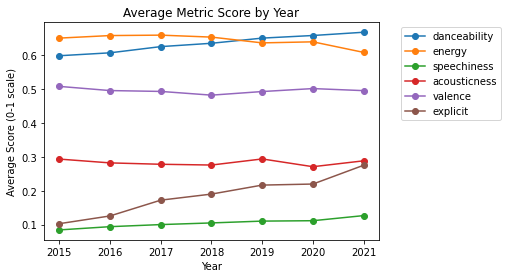

In [6]:
# Graph the above mean values
plt.plot(grouped_avg,marker ="o")
plt.xlabel("Year")
plt.ylabel("Average Score (0-1 scale)")
plt.title("Average Metric Score by Year")
plt.legend(["danceability", "energy", "speechiness", "acousticness", "valence", "explicit"],bbox_to_anchor=(1.05, 1), loc='upper left')

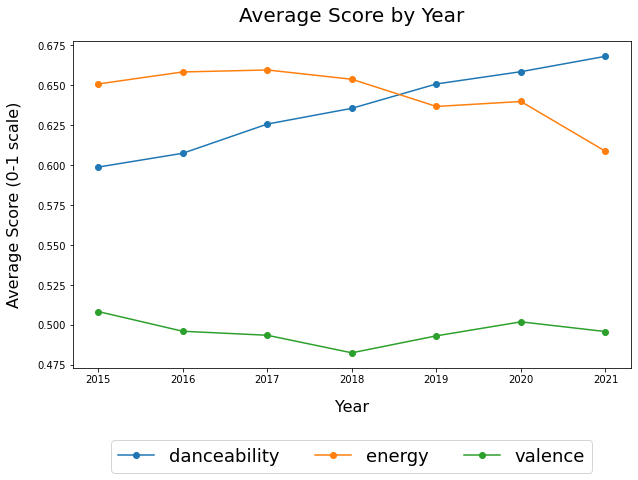

In [7]:
# Dividing the above graph based on its scale. High score categories are "danceability", "energy", "valence"
plt.figure(figsize=(10,6))

plt.plot(grouped_avg.iloc[:,[0, 1, 4]], marker="o")
plt.xlabel("Year", fontsize=16, labelpad=15)
plt.ylabel("Average Score (0-1 scale)", fontsize=16, labelpad=15)
plt.title("Average Score by Year", fontsize=20, pad=20)
plt.legend(["danceability", "energy", "valence"], loc="lower center", bbox_to_anchor=(0.5, -.35), ncol=3, fontsize=18)
plt.savefig("Average High Score by Year", facecolor="none", bbox_inches='tight')
plt.show()

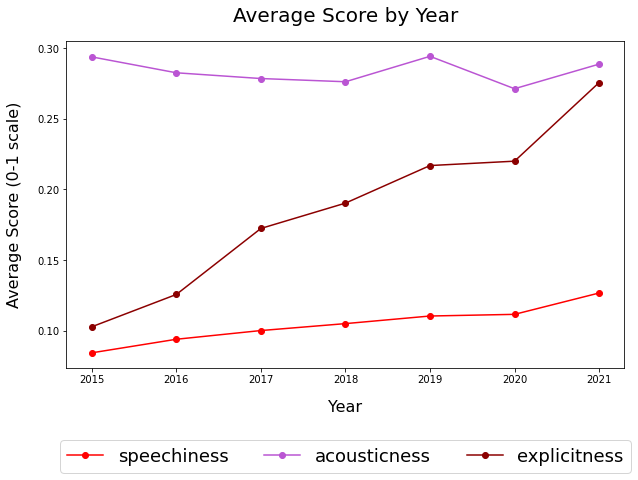

In [8]:
# Low score categories are "acousticness", "explicit", and "speechness"
plt.figure(figsize=(10,6))
plt.plot(grouped_avg.iloc[:,2], marker="o", color="red")
plt.plot(grouped_avg.iloc[:,3], marker="o", color="mediumorchid")
plt.plot(grouped_avg.iloc[:,5], marker="o", color="darkred")
plt.xlabel("Year", fontsize=16, labelpad=15)
plt.ylabel("Average Score (0-1 scale)", fontsize=16, labelpad=15)
plt.title("Average Score by Year", fontsize=20, pad=20)
plt.legend(["speechiness", "acousticness", "explicitness"], loc="lower center", bbox_to_anchor=(0.5, -.35), ncol=3, fontsize=18)
plt.savefig("Average Low Score by Year", facecolor="none", bbox_inches='tight')
plt.show()



In [9]:
# Music Trends by Quarter
quarter_avg = tracks.groupby("quarter").agg({"danceability": "mean","energy":"mean", "speechiness":"mean", 
                                      "acousticness":"mean", "valence":"mean", "explicit":"mean"})
quarter_avg

,danceability,energy,speechiness,acousticness,valence,explicit
quarter,,,,,,
2015Q1,0.584864,0.626621,0.082869,0.326555,0.505978,0.088995
2015Q2,0.610594,0.662087,0.086493,0.285517,0.533339,0.116157
2015Q3,0.601135,0.650363,0.086106,0.293114,0.501693,0.124811
2015Q4,0.599846,0.661488,0.083057,0.275107,0.497138,0.091331
2016Q1,0.609675,0.643162,0.091436,0.306751,0.512649,0.110667
2016Q2,0.624561,0.648443,0.095057,0.283944,0.515442,0.121671
2016Q3,0.610468,0.639502,0.090701,0.309633,0.502124,0.141522
2016Q4,0.593519,0.684760,0.096646,0.251022,0.470125,0.127637
2017Q1,0.624340,0.644630,0.097600,0.301165,0.510460,0.132911


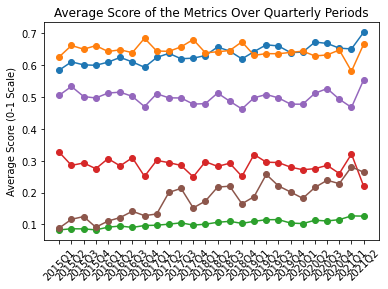

In [10]:
plt.plot(quarter_avg, marker="o")
plt.title("Average Score of the Metrics Over Quarterly Periods")
plt.xticks(rotation=45)
plt.ylabel("Average Score (0-1 Scale)")
plt.show()

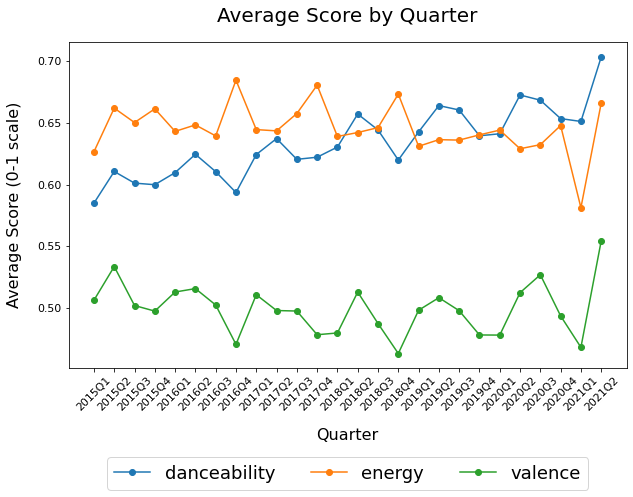

In [11]:
# High Value Contents
plt.figure(figsize=(10,6))
plt.plot(quarter_avg.iloc[:,[0,1,4]], marker="o")
plt.title("Average Score by Quarter", fontsize=20, pad=20)
plt.xticks(rotation=45, fontsize=11)
plt.ylabel("Average Score (0-1 scale)", fontsize=16, labelpad=15)
plt.xlabel("Quarter", fontsize=16, labelpad=15)
plt.yticks(fontsize=11)
plt.legend(["danceability", "energy", "valence"], loc="lower center", bbox_to_anchor=(0.5, -.4), ncol=3, fontsize=18)
plt.savefig("Average High Score by Quarter", facecolor="none", bbox_inches='tight')
plt.show()

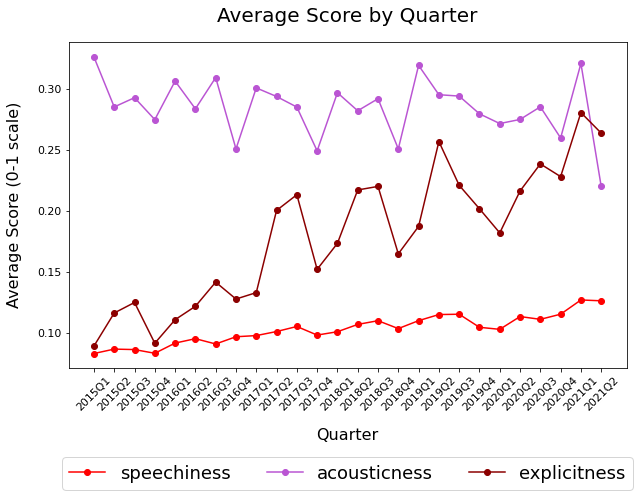

In [12]:
# Low Value Contents

plt.figure(figsize=(10,6))
plt.plot(quarter_avg.iloc[:,2], marker="o", color="red")
plt.plot(quarter_avg.iloc[:,3], marker="o", color="mediumorchid")
plt.plot(quarter_avg.iloc[:,5], marker="o", color="darkred")
plt.xticks(rotation=45, fontsize=11)
plt.ylabel("Average Score (0-1 scale)", fontsize=16, labelpad=15)
plt.xlabel("Quarter", fontsize=16, labelpad=15)
plt.yticks(fontsize=11)
plt.title("Average Score by Quarter", fontsize=20, pad=20)
plt.legend(["speechiness", "acousticness", "explicitness"], loc="lower center", bbox_to_anchor=(0.5, -.4), ncol=3, fontsize=18)
plt.savefig("Average Low Score by Quarter", facecolor="none", bbox_inches='tight')
plt.show()

In [13]:
# create a timeperiod column that shows pre covid and covid time period
# pre covid = 1/1/15 thru 12/31/19
# covid = 1/1/20 thru 4/30/21
conditions = [tracks["year"] <=2019, tracks["year"] >= 2020]
values = ["pre-covid", "covid"]
tracks["time_period"] = np.select(conditions, values)
tracks.head()

,Unnamed: 0,name,popularity,duration_in_seconds,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,quarter,time_period
0,0,A Lover's Concerto,41,159.560,0,['The Toys'],2020-03-13,0.671,0.867,-2.706,0.0571,0.436,0.000000,0.1390,0.839,120.689,2020-03-01,2020,2020Q1,covid
1,1,The September Of My Years - Live At The Sands ...,26,187.333,0,['Frank Sinatra'],2018-05-04,0.319,0.201,-17.796,0.0623,0.887,0.000000,0.9040,0.239,117.153,2018-05-01,2018,2018Q2,pre-covid
2,2,It Was A Very Good Year - Live At The Sands Ho...,25,236.800,0,['Frank Sinatra'],2018-05-04,0.269,0.129,-18.168,0.0576,0.938,0.000005,0.6830,0.160,82.332,2018-05-01,2018,2018Q2,pre-covid
3,3,"The Circle Game - Live at The 2nd Fret, Philad...",18,313.093,0,['Joni Mitchell'],2020-10-30,0.644,0.212,-14.118,0.0347,0.881,0.000022,0.7980,0.441,117.072,2020-10-01,2020,2020Q4,covid
4,4,"Urge For Going - Live at The 2nd Fret, Philade...",18,295.093,0,['Joni Mitchell'],2020-10-30,0.627,0.184,-15.533,0.0450,0.955,0.000162,0.0986,0.299,115.864,2020-10-01,2020,2020Q4,covid


<Figure size 864x504 with 0 Axes>

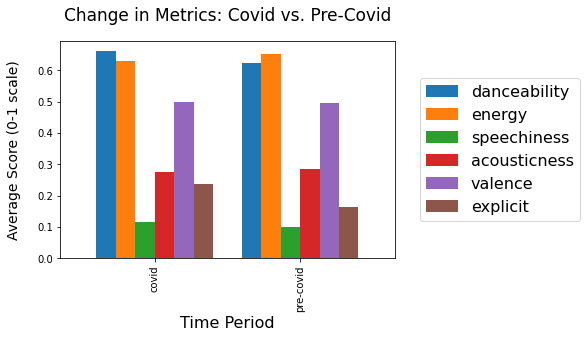

In [14]:
#group by time period and aggregate means of selected metrics
tp_group = tracks.groupby("time_period").agg({"danceability": "mean","energy":"mean", "speechiness":"mean", 
                                      "acousticness":"mean", "valence":"mean", "explicit":"mean"})
#plot a bar chart
plt.figure(figsize=(12,7))
columns_forPlot = tp_group
columns_forPlot.plot(kind="bar", width=.8)
plt.ylabel("Average Score (0-1 scale)", fontsize=14, labelpad=16)
plt.xlabel("Time Period", fontsize=16)
plt.title("Change in Metrics: Covid vs. Pre-Covid", fontsize=17, pad=20, loc='center')
plt.legend(bbox_to_anchor=(1.05, .5), loc='center left', fontsize=16)
plt.savefig("../Covid_Pre-Covid_Metrics_SS.png",  facecolor="none", bbox_inches='tight')

In [15]:
#null hypothesis - danceability scores of songs released did not increase by a statistically\
# significant margin during the covid period (defined as 1/1/20 - 4/30/21)\
# as compared to the control period (1/1/15 - 12/31/19) 

#alt hypothesis - danceability scores of songs released increased by a statistically \
# significant margin during the covid period (defined as 1/1/20 - 4/30/21) as compared\
# to the control period (1/1/15 - 12/31/19)

In [16]:
# two sample t test
#create t test population 1
population1 = tracks[tracks["time_period"] == "pre-covid"]
population1.danceability.mean()

0.6244051452500314

In [17]:
#create t test population 2
population2 = tracks[tracks["time_period"] == "covid"]
population2.danceability.mean()

0.6614205373195655

In [18]:
#run t test
sp_stats.ttest_ind(population1.danceability, population2.danceability, equal_var=False)

Ttest_indResult(statistic=-28.064263796708662, pvalue=2.052586935813239e-171)

In [19]:
#result indicates that we can reject the null hypothesis, and danceability is statistically different between the time periods

In [20]:
# further statistical analysis with MANOVA
# does the time_period have a significant contribution to our dependent variables (music metrics)
maov = MANOVA.from_formula('danceability + energy + speechiness + acousticness + valence + explicit ~ time_period', data=tracks)

In [21]:
print(maov.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF     F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda  0.0784 6.0000 72713.0000 142420.5361 0.0000
         Pillai's trace  0.9216 6.0000 72713.0000 142420.5361 0.0000
 Hotelling-Lawley trace 11.7520 6.0000 72713.0000 142420.5361 0.0000
    Roy's greatest root 11.7520 6.0000 72713.0000 142420.5361 0.0000
--------------------------------------------------------------------
                                                                    
--------------------------------------------------------------------
          time_period       Value  Num DF   Den DF   F Value  Pr > F
--------------------------------------------------------------------
              Wilks' lambda 0.9800 6.0000 72713.0000 246

In [22]:
# time_period does significantly contribute to the dependent music metrics for songs released as demonstrated by the p val < .05\
# however, the Wilks' lamda score (ranging 0-1) is very far from zero.\
# meaning, the time_period does significantly contribute to the metrics, but not overwhelmingly so (e.g. 1- wilks' lamba of .98 = .02 explained by time_period)

In [23]:
# do a aov to ensure no type 1 error
# relative threshold = confidence level/# dependents
rel_threshold = .05/6
rel_threshold

0.008333333333333333

In [24]:
#check danceability
reg1 = ols('danceability~time_period', data=tracks).fit()
aov = sm.stats.anova_lm(reg1, type=2)
print(aov)

                  df       sum_sq    mean_sq           F         PR(>F)
time_period      1.0    19.532325  19.532325  771.595112  6.207317e-169
Residual     72718.0  1840.799141   0.025314         NaN            NaN


In [25]:
#danceability is below relative threshold, therefore there is a significant difference in danceability between timeperiods

In [26]:
#check energy
reg2 = ols('energy~time_period', data=tracks).fit()
aov = sm.stats.anova_lm(reg2, type=2)
print(aov)

                  df       sum_sq   mean_sq           F        PR(>F)
time_period      1.0     6.153001  6.153001  138.413284  6.326821e-32
Residual     72718.0  3232.593592  0.044454         NaN           NaN


In [27]:
#energy is below relative threshold, therefore there is a significant difference in energy between timeperiods

In [28]:
#check speechiness
reg3 = ols('speechiness~time_period', data=tracks).fit()
aov = sm.stats.anova_lm(reg3, type=2)
print(aov)

                  df      sum_sq   mean_sq           F        PR(>F)
time_period      1.0    4.074887  4.074887  396.908672  4.460944e-88
Residual     72718.0  746.563687  0.010267         NaN           NaN


In [29]:
#speechiness is below relative threshold, therefore there is a significant difference in speechiness between timeperiods

In [30]:
#check acousticness
reg4 = ols('acousticness~time_period', data=tracks).fit()
aov = sm.stats.anova_lm(reg4, type=2)
print(aov)

                  df       sum_sq   mean_sq          F  PR(>F)
time_period      1.0     1.118379  1.118379  13.836066  0.0002
Residual     72718.0  5877.846411  0.080831        NaN     NaN


In [31]:
#acousticness is below relative threshold, therefore there is a significant difference in acousticness between timeperiods\
# but not as much as the other factors so far based on p val

In [32]:
#check valence
reg5 = ols('valence~time_period', data=tracks).fit()
aov = sm.stats.anova_lm(reg5, type=2)
print(aov)

                  df       sum_sq   mean_sq         F    PR(>F)
time_period      1.0     0.438656  0.438656  7.435849  0.006395
Residual     72718.0  4289.786315  0.058992       NaN       NaN


In [33]:
#valence is below relative threshold, therefore there is a significant difference in valence between timeperiods\
# but not as much as the other factors so far based on p val

In [34]:
#check explicit
reg6 = ols('explicit~time_period', data=tracks).fit()
aov = sm.stats.anova_lm(reg6, type=2)
print(aov)

                  df        sum_sq    mean_sq           F         PR(>F)
time_period      1.0     76.579728  76.579728  516.876285  5.066406e-114
Residual     72718.0  10773.805736   0.148159         NaN            NaN


In [35]:
#explicit is below relative threshold, therefore there is a significant difference in explicit between timeperiods

In [36]:
# based on the above, time_period seems to impact danceability the most and there is a significant difference in\
# danceability scores released in covid era vs. pre-covid era

# STREAMING ANALYSIS

In [37]:
#flip popularity metric for equation and define power law equation with constants from study
tracks["popularity_flip"] = 101 - tracks["popularity"]
def power_law(x):
    return 2368900* np.power(x, -0.5426)

#calculate number of streams using popularity variable using power-law
streams = []
for value in tracks["popularity_flip"]:
  streams.append(power_law(value))
tracks['streams'] = streams

# define function for adjusting metrics based on number of streams (weights)
def adjuster(tracks, parameter, time_period):
    tracks[f'{parameter}_adjusted'] = (tracks[parameter]*tracks['streams'])
    adjusted = tracks.groupby([time_period])[f'{parameter}_adjusted'].sum()/tracks.groupby([time_period]).streams.sum()
    return adjusted

#set parameters (list of metrics) and create lists for adjusted metrics by month/quarter
parameters = ['explicit', 'tempo', 'energy', 'valence', 'liveness', 'speechiness', 'danceability', 'acousticness','instrumentalness']
adjusted_monthly_series = []
adjusted_quarter_series = []

# use adjuster function to iterate over (adjust) metrics, appending lists with final values
for parameter in parameters:
    adjusted_monthly_series.append({parameter: adjuster(tracks, parameter, 'month')})
    adjusted_quarter_series.append({parameter: adjuster(tracks, parameter, 'quarter')})


In [38]:
adjusted_monthly_series

[{'explicit': month
  2015-01-01    0.089392
  2015-02-01    0.105507
  2015-03-01    0.097712
  2015-04-01    0.120132
  2015-05-01    0.109790
                  ...   
  2020-12-01    0.215972
  2021-01-01    0.217945
  2021-02-01    0.283652
  2021-03-01    0.395621
  2021-04-01    0.300383
  Length: 76, dtype: float64},
 {'tempo': month
  2015-01-01    120.624251
  2015-02-01    122.790660
  2015-03-01    121.601999
  2015-04-01    120.818352
  2015-05-01    120.885481
                   ...    
  2020-12-01    123.818982
  2021-01-01    121.600298
  2021-02-01    122.704004
  2021-03-01    120.640336
  2021-04-01    120.844189
  Length: 76, dtype: float64},
 {'energy': month
  2015-01-01    0.604043
  2015-02-01    0.646094
  2015-03-01    0.665574
  2015-04-01    0.669613
  2015-05-01    0.653699
                  ...   
  2020-12-01    0.670036
  2021-01-01    0.564497
  2021-02-01    0.624547
  2021-03-01    0.606147
  2021-04-01    0.658546
  Length: 76, dtype: float64},
 {'va

In [39]:
# turn quarter adjusted metrics into dataframe
quarter_adjusted_df = pd.concat([pd.DataFrame(l) for l in adjusted_quarter_series],axis=1)

# CHARTS

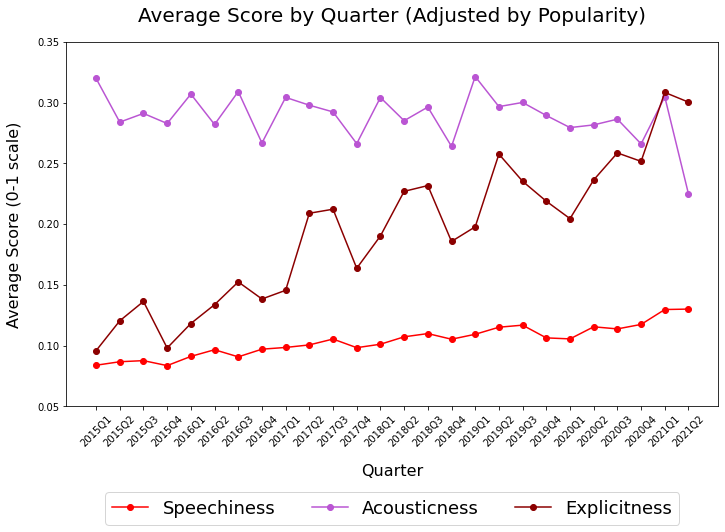

In [40]:
# plot data over time
x = np.arange(0,len(quarter_adjusted_df.index),1)
plt.figure(figsize=(10,6))
plt.xticks(ticks=x, labels=quarter_adjusted_df.index)
plt.xticks(x, rotation='vertical')
plt.xticks(rotation=45)
plt.ylim(0.05, .35)
plt.tight_layout()
color = ("red", "mediumorchid","darkred")
plt.gca().set_prop_cycle(color=color)
plt.ylabel("Average Score (0-1 scale)", fontsize=16, labelpad=15)
plt.xlabel("Quarter", fontsize=16, labelpad=15)
plt.title("Average Score by Quarter (Adjusted by Popularity)", fontsize=20, pad=20)
plt.plot(x, quarter_adjusted_df[['speechiness', 'acousticness', 'explicit']], marker="o")
plt.legend(['Speechiness', 'Acousticness', 'Explicitness'],  loc="lower center", bbox_to_anchor=(0.5, -.35), ncol=3, fontsize=18)
plt.savefig("../SEA_streaming.png",  facecolor="none", bbox_inches='tight')

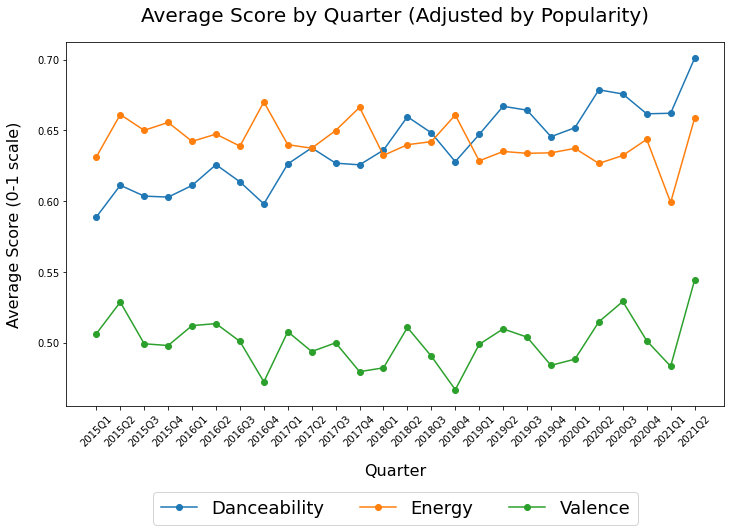

In [41]:
# plot data over time (2)
x = np.arange(0,len(quarter_adjusted_df.index),1)
plt.figure(figsize=(10,6))
plt.xticks(ticks=x, labels=quarter_adjusted_df.index)
plt.xticks(x, rotation='vertical')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel("Average Score (0-1 scale)", fontsize=16, labelpad=15)
plt.xlabel("Quarter", fontsize=16, labelpad=15)
plt.title("Average Score by Quarter (Adjusted by Popularity)", fontsize=20, pad=20)
plt.plot(x, quarter_adjusted_df[['danceability', 'energy', 'valence']], marker="o")
plt.legend(['Danceability', 'Energy', 'Valence'], loc="lower center", bbox_to_anchor=(0.5, -.35), ncol=3, fontsize=18)
plt.savefig("../DEV_streaming.png", facecolor="none", bbox_inches='tight')

# COVID vs. PRE-COVID

In [42]:
# create a time column that shows pre covid and covid time period
# pre covid = 1/1/15 thru 12/31/19
# covid = 1/1/20 thru 4/30/21
conditions = [tracks["year"] <=2019, tracks["year"] >= 2020]
values = ["Pre-Covid", "Covid"]
tracks["time"] = np.select(conditions, values)

# define function for grouping metrics by pre- and post-covid, adjust metrics based on number of streams (weights)
def adjuster2(tracks, parameter):
    adjusted_cvd = tracks.groupby(['time'])[f'{parameter}_adjusted'].sum()/tracks.groupby(['time']).streams.sum()
    return adjusted_cvd

#set parameters (list of metrics) and create a list for adjusted metrics by pre- and post-covid
parameters = ['tempo', 'energy', 'valence', 'liveness', 'speechiness', 'danceability', 'acousticness','instrumentalness', 'explicit']
adjusted_covid_series = []

# use adjuster function to iterate over (adjust) metrics, appending lists with final values
for parameter in parameters:
    adjusted_covid_series.append({parameter: adjuster2(tracks, parameter)})

In [43]:
tracks_covid = tracks[tracks['time']=='Covid'].copy()
tracks_precovid = tracks[tracks['time']== 'Pre-Covid'].copy()
parameters = ['tempo', 'energy', 'valence', 'liveness', 'speechiness', 'danceability', 'acousticness', 'instrumentalness', 'explicit']

for tracks_df in [tracks_covid, tracks_precovid]:
    for parameter in parameters:
        tracks_df[f'{parameter}_adjusted'] = (tracks_df[parameter]*tracks['streams'])
        tracks_df[f'{parameter}_adjusted'] = tracks_df[f'{parameter}_adjusted']/tracks_df.streams.sum()

<Figure size 864x504 with 0 Axes>

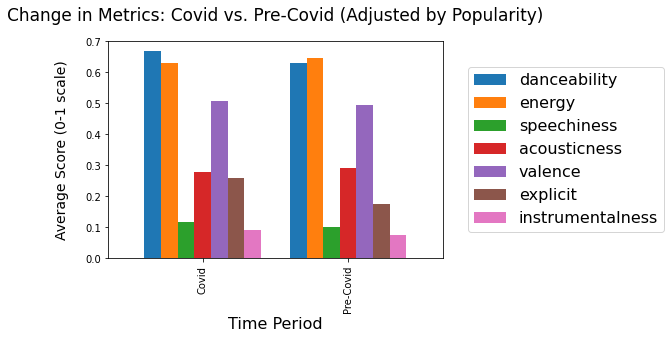

In [44]:
# turn covid adjusted metrics into dataframe and group columsn for plot
df = pd.concat([pd.DataFrame(l) for l in adjusted_covid_series],axis=1)
plt.figure(figsize=(12,7))
columns_forPlot = df[['danceability', 'energy', 'speechiness', 'acousticness','valence','explicit','instrumentalness']]
columns_forPlot.plot(kind="bar", width=.8)
plt.ylabel("Average Score (0-1 scale)", fontsize=14, labelpad=16)
plt.xlabel("Time Period", fontsize=16)
plt.title("Change in Metrics: Covid vs. Pre-Covid (Adjusted by Popularity)", fontsize=17, pad=20, loc='center')
plt.legend(bbox_to_anchor=(1.05, .5), loc='center left', fontsize=16)
plt.savefig("../Covid_Pre-Covid_Metrics.png",  facecolor="none", bbox_inches='tight')

# STATISTICAL TESTS
### T-TEST, MANOVA, AOV

In [45]:
# create a for loop to run t-tests
for parameter in parameters:
    print(parameter)
    print(sp_stats.ttest_ind(tracks_precovid[parameter], tracks_covid[parameter], equal_var=False))
    print('-'*100)

tempo
Ttest_indResult(statistic=-1.314974265075993, pvalue=0.18852727146005055)
----------------------------------------------------------------------------------------------------
energy
Ttest_indResult(statistic=12.002222079172386, pvalue=4.001757788983059e-33)
----------------------------------------------------------------------------------------------------
valence
Ttest_indResult(statistic=-2.7595785260712256, pvalue=0.0057905709353198356)
----------------------------------------------------------------------------------------------------
liveness
Ttest_indResult(statistic=11.11164497289445, pvalue=1.2192085047934908e-28)
----------------------------------------------------------------------------------------------------
speechiness
Ttest_indResult(statistic=-19.12942174510296, pvalue=4.0624623487410505e-81)
----------------------------------------------------------------------------------------------------
danceability
Ttest_indResult(statistic=-28.064263796708662, pvalue=2.0525

In [46]:
# Run MANOVA
maov_2 = MANOVA.from_formula('danceability_adjusted + energy_adjusted + speechiness_adjusted + acousticness_adjusted + valence_adjusted ~time', data=tracks)
print(maov_2.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.2013 5.0000 72714.0000 57701.3145 0.0000
         Pillai's trace 0.7987 5.0000 72714.0000 57701.3145 0.0000
 Hotelling-Lawley trace 3.9677 5.0000 72714.0000 57701.3145 0.0000
    Roy's greatest root 3.9677 5.0000 72714.0000 57701.3145 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
            time          Value  Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.9767 5.0000 72714.0000 346.7975 0.0000
           Pilla

In [47]:
# create a for loop to run AOVs
for parameter in parameters:
    print(parameter)
    regs = ols(f'{parameter}~time', data=tracks).fit()
    aov = sm.stats.anova_lm(regs, type=2)
    print(aov)
    print('-'*100)

tempo
               df        sum_sq      mean_sq         F    PR(>F)
time          1.0  1.450556e+03  1450.555735  1.730625  0.188335
Residual  72718.0  6.094997e+07   838.168944       NaN       NaN
----------------------------------------------------------------------------------------------------
energy
               df       sum_sq   mean_sq           F        PR(>F)
time          1.0     6.153001  6.153001  138.413284  6.326821e-32
Residual  72718.0  3232.593592  0.044454         NaN           NaN
----------------------------------------------------------------------------------------------------
valence
               df       sum_sq   mean_sq         F    PR(>F)
time          1.0     0.438656  0.438656  7.435849  0.006395
Residual  72718.0  4289.786315  0.058992       NaN       NaN
----------------------------------------------------------------------------------------------------
liveness
               df       sum_sq   mean_sq           F        PR(>F)
time          1.0    